In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [55]:
df = pd.read_csv("airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [23]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [31]:
# 1.How many rows and columns does the dataset have? Are there any missing values?

shape = df.shape
missing_values = df.isnull().sum()
print(shape)
print(missing_values)

(300153, 12)
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


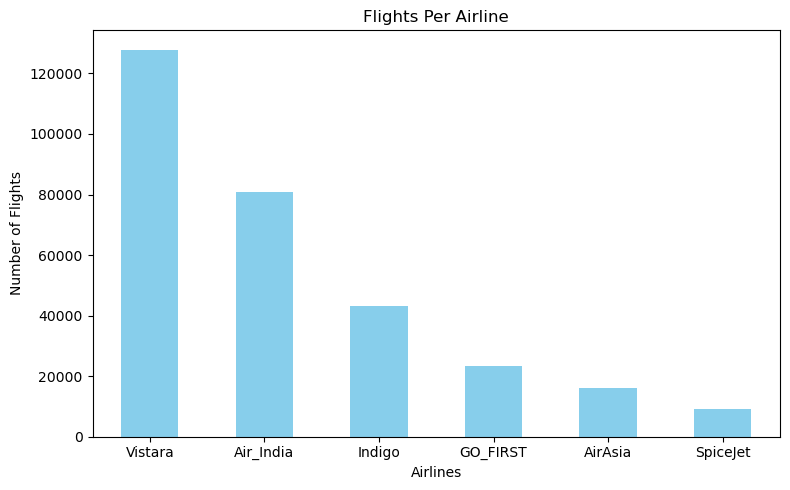

In [35]:
#2.Count how many flights each airline operates and plot it using Matplotlib.

airline_counts = df["airline"].value_counts()
print(airline_counts)

plt.figure(figsize=(8,5))
airline_counts.plot(kind = "bar",color = "skyblue")
plt.title("Flights Per Airline")
plt.xlabel("Airlines")
plt.ylabel("Number of Flights")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
#3.What are the top 5 most common city-to-city flight routes?

top_routes = df[['source_city', 'destination_city']].value_counts().head(5).reset_index(name='count')
display(top_routes)

,source_city,destination_city,count
0,Delhi,Mumbai,15289
1,Mumbai,Delhi,14809
2,Delhi,Bangalore,14012
3,Bangalore,Delhi,13756
4,Bangalore,Mumbai,12939


class
Economy     206666
Business     93487
Name: count, dtype: int64


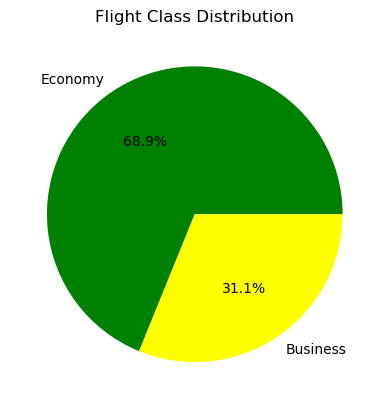

In [39]:
#4.How many Economy vs Business class flights are there? (Pie chart)

class_counts = df["class"].value_counts()
print(class_counts)

plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors=['green','yellow'])
plt.title("Flight Class Distribution")
plt.show()

In [41]:
#5.How many flights have zero, one, or multiple stops?

stop_counts = df["stops"].value_counts()
print(stop_counts)

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64


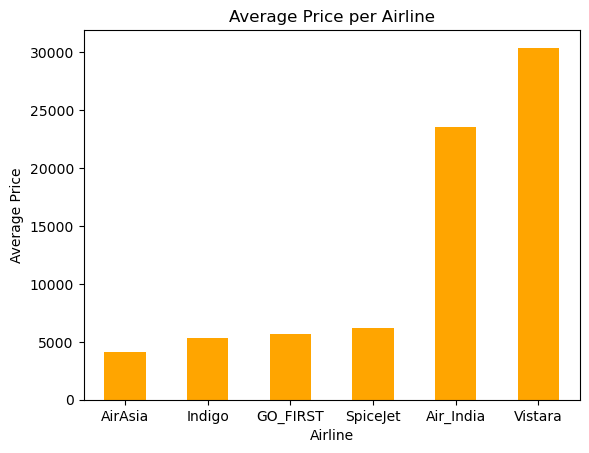

In [44]:
#6.Find the average price per airline and visualize with a bar chart.

avg_price_airline = df.groupby('airline')['price'].mean().sort_values()
print(avg_price_airline)

avg_price_airline.plot(kind='bar', color='orange')
plt.title('Average Price per Airline')
plt.ylabel('Average Price')
plt.xlabel('Airline')
plt.xticks(rotation=0)
plt.show()

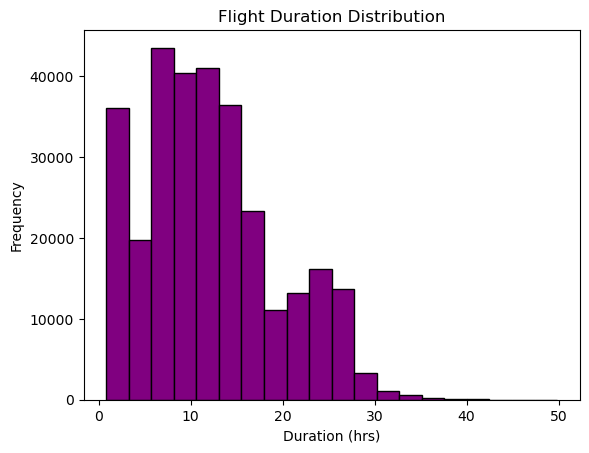

In [12]:
#7.Plot a histogram of flight durations using Matplotlib/Seaborn.

plt.hist(df['duration'], bins=20, color='purple', edgecolor='black')
plt.title('Flight Duration Distribution')
plt.xlabel('Duration (hrs)')
plt.ylabel('Frequency')
plt.show()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64


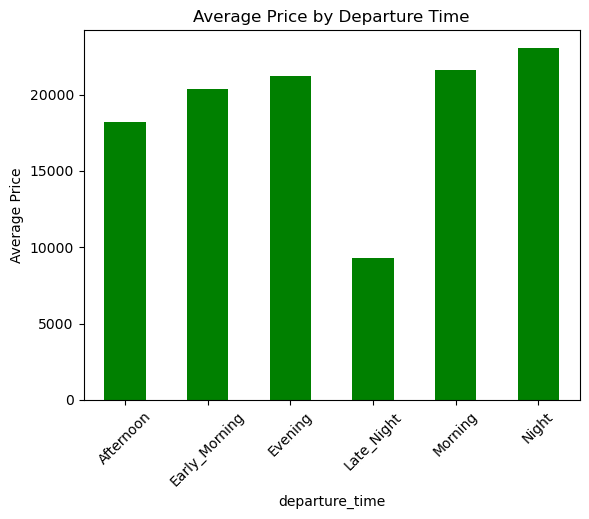

In [47]:
#8.Compare average prices for flights departing at different times of the day.

avg_price_dep = df.groupby('departure_time')['price'].mean()
print(avg_price_dep)

avg_price_dep.plot(kind='bar', color='green')
plt.title('Average Price by Departure Time')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

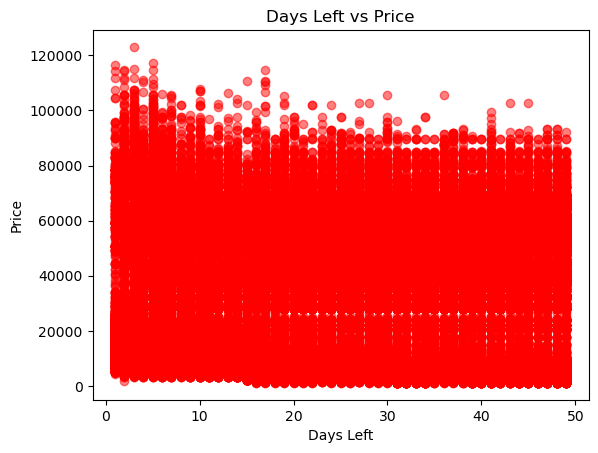

In [19]:
#9.Is there a trend between days left for departure and ticket prices? (Line chart)

plt.scatter(df['days_left'], df['price'], alpha=0.5, color='red')
plt.title('Days Left vs Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

In [48]:
#10.Which source–destination pairs have the highest average prices?

expensive_routes = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()
expensive_routes = expensive_routes.sort_values('price', ascending=False).head(5)
display(expensive_routes)

,source_city,destination_city,price
5,Chennai,Bangalore,25081.850454
21,Kolkata,Chennai,23660.361040
3,Bangalore,Kolkata,23500.061229
0,Bangalore,Chennai,23321.850078
25,Mumbai,Bangalore,23147.873807


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


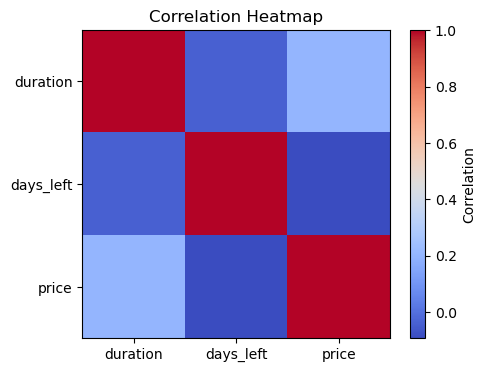

In [49]:
#11.Use Pandas & NumPy to check correlations between duration, days_left, and price.

corr_matrix = df[['duration', 'days_left', 'price']].corr()
display(corr_matrix)

plt.figure(figsize=(5,4))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()

class,Business,Economy
airline,,
AirAsia,NaN,4091.072742
Air_India,47131.039212,7313.682169
GO_FIRST,NaN,5652.007595
Indigo,NaN,5324.216303
SpiceJet,NaN,6179.278881
Vistara,55477.027777,7806.943645


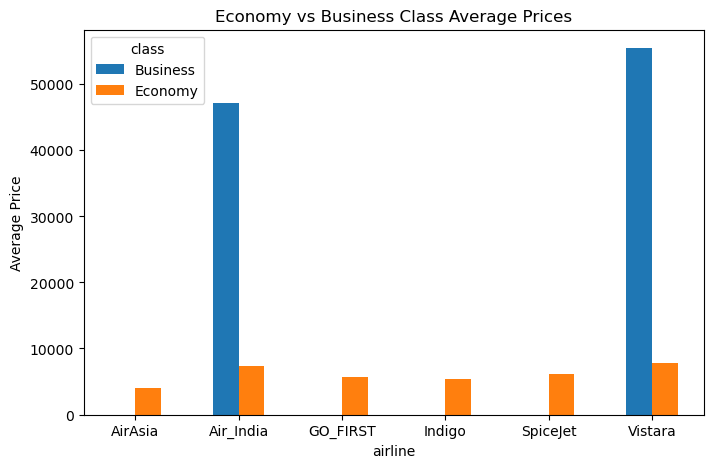

In [50]:
#12.Compare average ticket prices for Economy vs Business class for each airline.

class_price_airline = df.groupby(['airline', 'class'])['price'].mean().unstack()
display(class_price_airline)

class_price_airline.plot(kind='bar', figsize=(8,5))
plt.ylabel("Average Price")
plt.title("Economy vs Business Class Average Prices")
plt.xticks(rotation=0)
plt.show()

In [27]:
#13.For each route, determine which departure time is cheapest on average.

best_time_route = df.groupby(['source_city', 'destination_city', 'departure_time'])['price'].mean().reset_index()
best_time_route = best_time_route.loc[best_time_route.groupby(['source_city', 'destination_city'])['price'].idxmin()]
display(best_time_route)

,source_city,destination_city,departure_time,price
2,Bangalore,Chennai,Evening,21531.741822
6,Bangalore,Delhi,Afternoon,11640.980714
12,Bangalore,Hyderabad,Afternoon,12273.112871
21,Bangalore,Kolkata,Late_Night,7788.039604
24,Bangalore,Mumbai,Afternoon,15704.378619
30,Chennai,Bangalore,Afternoon,19310.029737
37,Chennai,Delhi,Evening,9281.149903
40,Chennai,Hyderabad,Afternoon,14251.267813
48,Chennai,Kolkata,Late_Night,5294.111111
51,Chennai,Mumbai,Afternoon,7910.655251


airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: proportion, dtype: float64


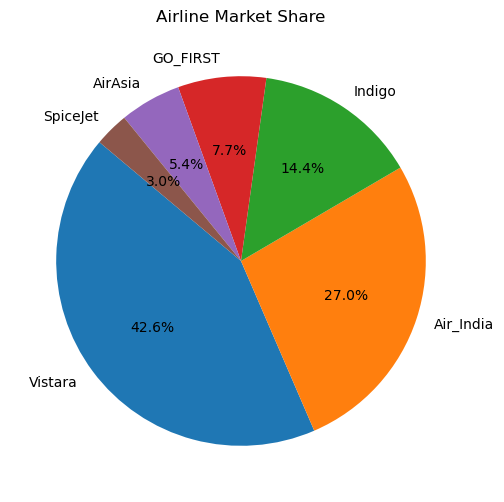

In [52]:
#14.Calculate percentage share of total flights for each airline and visualize in a pie chart.

market_share = df['airline'].value_counts(normalize=True) * 100
print(market_share)

plt.figure(figsize=(8, 6))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140)
plt.title('Airline Market Share')
plt.show()

In [53]:
#15.Detect unusually high or low prices using NumPy percentiles or IQR method.

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
display(len(outliers), outliers[['airline', 'source_city', 'destination_city', 'price']].head())

123

,airline,source_city,destination_city,price
215858,Vistara,Delhi,Kolkata,114434
215859,Vistara,Delhi,Kolkata,116562
216025,Vistara,Delhi,Kolkata,100395
216094,Vistara,Delhi,Kolkata,99129
216095,Vistara,Delhi,Kolkata,101369
